# Tensor Recovery Tutorial for Uniformly Distributed Measurements

In this example we apply the alternating least squares algorithm implemented in the ALS class in ALS.py. We aim to reconstruct a tensor $\theta = \theta_1\otimes...\otimes\theta_N \in\mathbb{R}^{d\times...\times d}$ from random uniformly distributed measurement tensors $A_i = a^{i}_1 \otimes ... \otimes a^{i}_N$ with $a^i_j\in\mathbb{R}^d$ for $i = 1,...,m $ and $ j = 1,..,N$ and corrsponding measurements $b_i = \langle A_i,\theta \rangle = \prod_{k = 1}^N \langle a^{i}_k,\theta_k\rangle$. Note that this means, we use unperturbed linear measurements in this example $\left(f_\theta(\cdot) = \langle \cdot ,\theta \rangle\right)$, but the implementation can be used for more general $f_\theta$.

We start by importing the ALS class from ALS.py as well as numpy to generate our measurements and pyplot to visualize our results.

In [3]:
from ALS import *
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

To generate our measurements tensors and the tensor to be recovered, we set the parameters:

In [81]:
d = 7 # dimension of leg vectors
N = 3 # order of tensor (number of leg vectors)
number_of_batches = N*10
batchsize = d**4 # number of measurements used to solve single least squares problem
validation_size = batchsize
m = number_of_batches*batchsize*N + validation_size # total number of measurements

We now choose a tensor theta, we aim to recover from measurements.

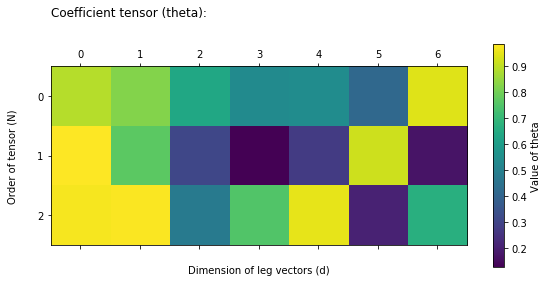

In [82]:
theta = np.random.rand(N,d)
plt.matshow(theta)
plt.title('Coefficient tensor (theta):',pad = 50,loc = 'left')
plt.colorbar(label='Value of theta')
plt.ylabel('Order of tensor (N)',labelpad=20)
plt.xlabel('Dimension of leg vectors (d)',labelpad=20)
plt.show()

As measuements $A_i$ we choose tensors with entries uniformly distributed in $[0,1]$ and calculate their measurements $b_i$ by the tensor scalar product of the measurement tensors and theta $\left(f_\theta(A_i) = \langle A_i, \theta \rangle = b_i\right)$. These are saved in A and b, respectively.

In [83]:
A = [np.random.uniform(0,1,(N,d)).tolist() for i in range(m)]
b = [np.prod([np.dot(A[i][j],theta[j]) for j in range(len(theta))]) for i in range(m)]

We choose an initial tensor x_init by drawing every entry from a uniform distribution $U\left([0,1)\right)$. 

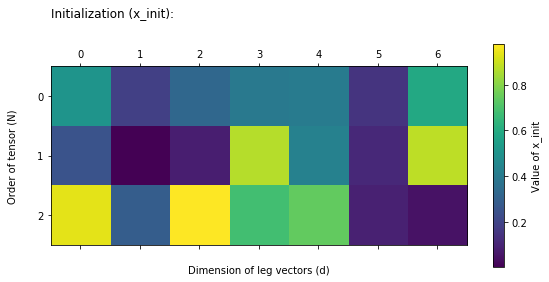

In [84]:
x_init = np.random.rand(N,d).tolist()
#x_init = [[theta[i][j] + 0.1*np.random.rand() for j in range(len(theta[0]))] for i in range(len(theta))]
plt.matshow(x_init)
plt.title('Initialization (x_init):',pad = 50,loc = 'left')
plt.colorbar(label = 'Value of x_init')
plt.ylabel('Order of tensor (N)',labelpad=20)
plt.xlabel('Dimension of leg vectors (d)',labelpad=20)
plt.show()

Finally, we apply the alternating least squares algorithm on the uniformly chosen measurements tensors in A, the exact measurements b, and the initial tensor x_init. The algorithm terminates as soon as either all measurements have been used, the $\ell_2$ loss of the updated tensor is smaller than minimal_l2_loss on the whole data set or the step size in one iteration is smaller than minimal_step_size.

In [85]:
%%capture
als = ALS(A,b,cp.deepcopy(x_init))

#set stopping criteria
als.minimal_l2_loss = 0.00000001
als.minimal_step_size = 0.00000001

als.batchsize = batchsize

# start algorithm
als.run_once()

To visualize our results, we firstly plot the real coefficients ($\theta$) alongside the result computed by the alternating least squares algorithm.

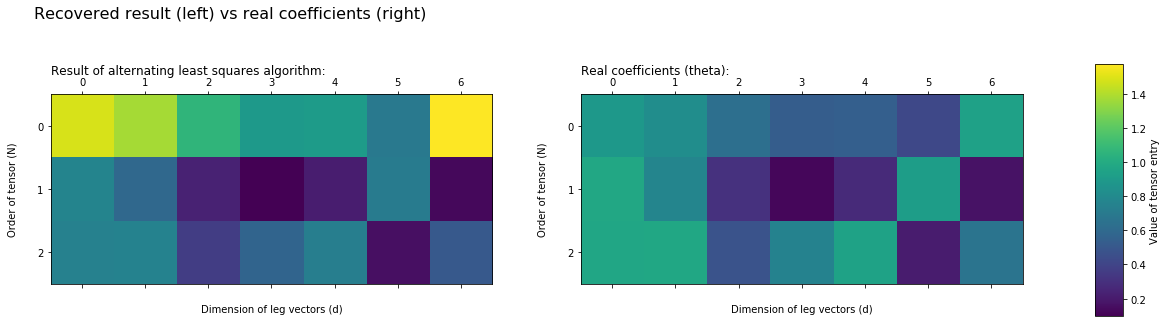

In [86]:
# show result vs real coefficients

fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Recovered result (left) vs real coefficients (right)',fontsize=16,x=0.25,y=1.01)
minval = np.min([np.min(als.x),np.min(theta)])
maxval = np.max([np.max(als.x),np.min(theta)])
# plot the result of the als
im = axs[0].matshow(als.x,vmin=minval,vmax=maxval)
axs[0].set_title('Result of alternating least squares algorithm:',pad = 20,loc = 'left')
axs[0].set_xlabel('Dimension of leg vectors (d)',labelpad=20)
axs[0].set_ylabel('Order of tensor (N)',labelpad=20)
#plot the real coefficients
im = axs[1].matshow(theta,vmin=minval,vmax=maxval)
axs[1].set_title('Real coefficients (theta):',pad = 20,loc = 'left')
axs[1].set_xlabel('Dimension of leg vectors (d)',labelpad=20)
axs[1].set_ylabel('Order of tensor (N)',labelpad=20)
# set the color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax,label = 'Value of tensor entry')
plt.show()

Furthermore, the entrywise difference between the result and real coefficients is plotted.

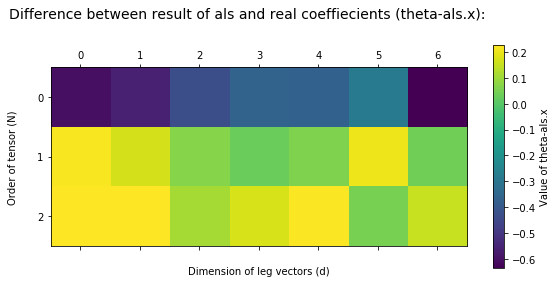

In [87]:
plt.matshow(np.subtract(theta,als.x))
plt.title('Difference between result of als and real coeffiecients (theta-als.x):',pad = 50,loc = 'left',fontsize=14,x=-0.1)
plt.colorbar(label = 'Value of theta-als.x')
plt.xlabel('Dimension of leg vectors (d)',labelpad=20)
plt.ylabel('Order of tensor (N)',labelpad=20)
plt.show()

Finally, for every iteration (one update of one leg vector) of the als the $\ell_2$ loss of the updated tensor on the validation data set (the first batch of the measurements) is plotted.

The algorithm terminated, because the l2 error is smaller than the minimal l2 loss 1e-08. 31213 measurements were used and the algorithm terminated with an l2 error of 5.908213733392377e-09 .


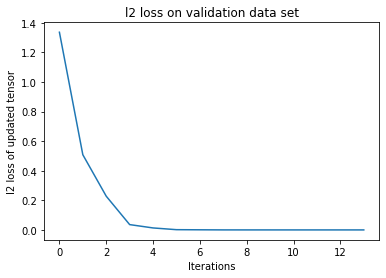

In [88]:
X = range(len(als.l2loss))
plt.plot(X,als.l2loss)
plt.title('l2 loss on validation data set')
plt.xlabel('Iterations')
plt.ylabel('l2 loss of updated tensor')
print(als.term)